In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import matplotlib.pyplot as plt
import yaml
import cv2
from scipy.spatial.transform import Rotation
from matplotlib.patches import Rectangle


sys.path.append('/home/schiavazza/code/hpe/')

from vicon_recordings.src.projection import ProjectionHelper
from vicon_recordings.src.data_helpers import DvsLabeler, DvsHelper, C3dHelper
from vicon_recordings.src import vis_utils, utils

In [2]:
# import the DVS data
dvs_file_path = '/home/schiavazza/data/hpe/vicon_recordings/giovanna/2'
dvs_helper = DvsHelper(dvs_file_path)

In [3]:
# define the point labels to use
labels = [
    'P000:RASI',
    'P000:LASI',
    'P000:STRN',
    'P000:CLAV',
    'P000:RFHD',
    'P000:LFHD',
    # 'LSHO',
    'P000:RSHO',
    'P000:RELB',
    'P000:RUPA',
    'P000:LELB',
    'P000:LFRM',
    'P000:RKNE',
    'P000:RTIB'
]

In [4]:
dvs_helper.read_points_labels('../data/points.yml');
labels_times = dvs_helper.labeled_points['times'][:2]
print(labels_times)

[8.0, 9.0]


In [5]:
# load c3d vicon data
c3d_file_path = '/home/schiavazza/data/hpe/vicon_recordings/EDPR_hpe/human_pose_estimation/P000/session/giovanna2.c3d'
c3d_helper = C3dHelper(c3d_file_path)
print(c3d_helper.reader.point_labels)

/home/schiavazza/code/hpe/vicon_recordings/venv/lib/python3.10/site-packages/c3d/c3d.py:1219: UserWarning: No analog data found in file.
  warnings.warn('No analog data found in file.')
/home/schiavazza/code/hpe/vicon_recordings/src/data_helpers.py:46: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, count = scipy.stats.mode(n_points)


['P000:LFHD                     ' 'P000:RFHD                     '
 'P000:LBHD                     ' 'P000:RBHD                     '
 'P000:C7                       ' 'P000:CLAV                     '
 'P000:STRN                     ' 'P000:RBAK                     '
 'P000:LSHO                     ' 'P000:LUPA                     '
 'P000:LELB                     ' 'P000:LFRM                     '
 'P000:LWRA                     ' 'P000:LWRB                     '
 'P000:LFIN                     ' 'P000:RSHO                     '
 'P000:RUPA                     ' 'P000:RELB                     '
 'P000:RFRM                     ' 'P000:RWRA                     '
 'P000:RWRB                     ' 'P000:RFIN                     '
 'P000:LASI                     ' 'P000:RASI                     '
 'P000:LPSI                     ' 'P000:RPSI                     '
 'P000:LTHI                     ' 'P000:LKNE                     '
 'P000:LTIB                     ' 'P000:LANK                  

In [6]:
# labels_times = [8.0, 9.0, 10.0, 11.0, 12.0, 13.0]
vicon_labeled_frames = c3d_helper.get_frame_time(labels_times)
vicon_points = c3d_helper.get_vicon_points(vicon_labeled_frames, labels)
vicon_points_mark = c3d_helper.transform_points_to_marker_frame(vicon_points)
# vicon_points_mark = vicon_points

[ 0.65906027 -0.06506833 -0.78626518]
[[ 1.00000000e+00  4.21627371e-10  3.17059883e-09]
 [ 3.17059878e-09 -4.47629533e-10 -1.00000000e+00]
 [-4.21627408e-10  1.00000000e+00 -4.47629537e-10]]
[ 0.68487079 -0.0490284  -0.75972835]
[[ 0.99952045 -0.01035002  0.02918473]
 [ 0.02889107 -0.02746986 -0.99920504]
 [ 0.01114349  0.99956905 -0.02715767]]


In [7]:
print(f"times from dvs labels: {dvs_helper.labeled_points['times']}")
print(f"times from vicon labels: {vicon_points_mark['times']}")
print(c3d_helper.start_time)
c3d_helper.find_start_time()
c3d_helper.calculate_frame_times()

times from dvs labels: [8.0, 9.0, 11.0]
times from vicon labels: [8.00362785 9.00400225]
[1.69]


array([-1.69      , -1.67999626, -1.66999251, ..., 25.00999251,
       25.01999626, 25.03      ])

In [8]:
# are we finding the correct marker frame of reference?


for k in range(1, 2000, 20):
    c3d_helper.marker_T_at_frame_vector(k)

[ 0.68965101  0.05692175 -0.71691989]
[[ 0.99017398  0.02399751  0.13776648]
 [ 0.1384416  -0.02919961 -0.98994005]
 [-0.01973336  0.9992855  -0.03223495]]
[ 0.69017927  0.05823124 -0.71585584]
[[ 0.98993995  0.0240762   0.13942462]
 [ 0.14011098 -0.02965991 -0.98969147]
 [-0.01969269  0.99927005 -0.03273487]]
[ 0.68976435  0.05851795 -0.71613319]
[[ 0.98992409  0.02441265  0.13947872]
 [ 0.14016706 -0.02920979 -0.98969692]
 [-0.02008698  0.99927514 -0.03233733]]
[ 0.68984799  0.05787544 -0.71632591]
[[ 0.99001643  0.02416799  0.13886457]
 [ 0.13954773 -0.02934009 -0.98978058]
 [-0.01984671  0.99927727 -0.03241976]]
[ 0.68994936  0.0573161  -0.71646595]
[[ 0.99009453  0.02393746  0.13834671]
 [ 0.13902533 -0.02948297 -0.98984984]
 [-0.01961561  0.99927862 -0.03251884]]
[ 0.69003086  0.0586231  -0.71583194]
[[ 0.98989006  0.02428403  0.13974242]
 [ 0.14043192 -0.02947925 -0.98965138]
 [-0.01991322  0.99927036 -0.03259147]]
[ 0.69026905  0.05819181 -0.71578607]
[[ 0.9899399   0.02401014 

In [9]:
proj_helper = ProjectionHelper(vicon_points_mark, dvs_helper.labeled_points)
proj_helper.import_camera_calbration('../data/temp_calib.txt');

Number of 3d points: 26
Number of image points: 26


In [10]:
# tmp = np.copy(proj_helper.image_points[:13])
# proj_helper.image_points[:13] = proj_helper.image_points[13:]
# proj_helper.image_points[13:] = tmp
# proj_helper.world_points = np.flip(proj_helper.world_points, axis=0)

In [11]:
T = proj_helper.find_R_t_opencv_ransac()
# T = proj_helper.T_to_transform(T)
print(T)

[[ 9.86596703e-01  1.90797086e-02 -1.62058352e-01 -3.83037419e+02]
 [-4.95170589e-02  9.81316072e-01 -1.85921565e-01  1.74232638e+02]
 [ 1.55483136e-01  1.91454256e-01  9.69107972e-01  1.41297403e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


dict with only the points
(49, 4)
(13, 4)
(13, 4)


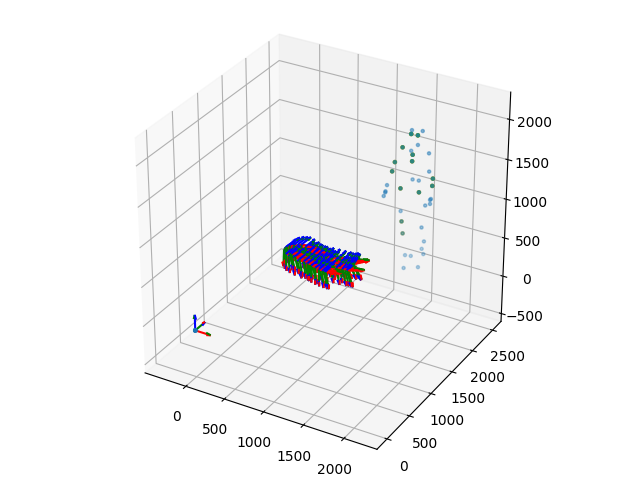

In [12]:
%matplotlib widget
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_box_aspect([1.0, 1.0, 1.0])

zero_Tr = np.eye(4)

vis_utils.plot_points_3d(ax, 
        proj_helper.transform_points(
            c3d_helper.points_dict_to_array(c3d_helper.get_points_dict(769)), zero_Tr))

for i in range(len(vicon_labeled_frames)):
    marker_T = np.linalg.inv(c3d_helper.markers_T[vicon_labeled_frames[i]])
    vis_utils.plot_points_3d(ax,
                            proj_helper.transform_points(
                                proj_helper.world_points[i*13:(1+i)*13],
                                marker_T
                            )
    )

vis_utils.plot_frame(ax, zero_Tr)

for Tr in c3d_helper.markers_T.values():
    vis_utils.plot_frame(ax, np.linalg.inv(Tr))
    # vis_utils.plot_frame(ax, np.linalg.inv(Tr) @ np.linalg.inv(T))

vis_utils.set_axes_equal(ax)
plt.tight_layout()
plt.show()

In [13]:
plt.close()

In [14]:
projected_points = proj_helper.project_to_frame(
    proj_helper.transform_points(
        proj_helper.world_points, zero_Tr
        )
    )

No such comm: 09b7630c2d0341a8a92b8e8a929ea955


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


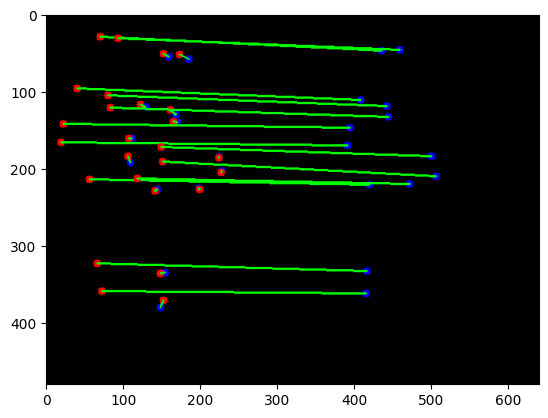

In [15]:
%matplotlib inline
plt.clf()
frame = np.zeros((480, 640, 3))
frame = vis_utils.plot_2d_difference(frame, proj_helper.image_points, projected_points)
plt.imshow(frame)
plt.show()

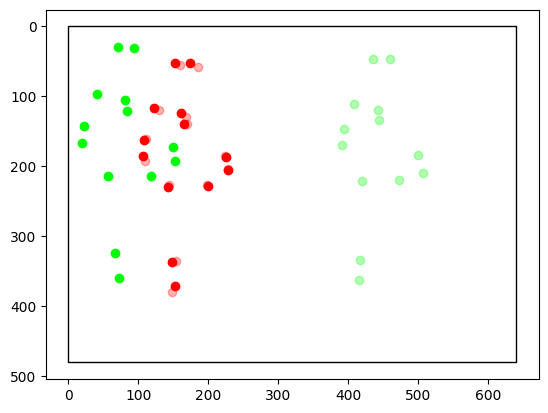

In [16]:
%matplotlib inline
fig = plt.figure()
ax = plt.axes()

vis_utils.plot_2d_points_plt(ax, projected_points[:13], color=(1.0, 0.0, 0.0))
vis_utils.plot_2d_points_plt(ax, projected_points[13:26], color=(0.0, 1.0, 0.0))
vis_utils.plot_2d_points_plt(ax, projected_points[26:39], color=(0.0, 0.0, 1.0))

alpha = 0.3
vis_utils.plot_2d_points_plt(ax, proj_helper.image_points[:13], color=(1.0, 0.0, 0.0), alpha=alpha)
vis_utils.plot_2d_points_plt(ax, proj_helper.image_points[13:26], color=(0.0, 1.0, 0.0), alpha=alpha)
vis_utils.plot_2d_points_plt(ax, proj_helper.image_points[26:39], color=(0.0, 0.0, 1.0), alpha=alpha)

ax.add_patch(Rectangle((0, 0), 640, 480, fill=False))

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax.set_xlim(min(0, xlim[0]), max(640, xlim[1]))
ax.set_ylim(min(0, ylim[0]), max(480, ylim[1]))

ax.axes.set_aspect('equal')

plt.gca().invert_yaxis()

In [17]:
projected_points

array([[141.91751412, 229.56138993,   1.        ],
       [199.1158335 , 227.19550906,   1.        ],
       [165.45058247, 139.25066557,   1.        ],
       [161.12235578, 124.22259819,   1.        ],
       [152.78130242,  51.47074098,   1.        ],
       [173.97822909,  52.68225533,   1.        ],
       [122.24276899, 117.02310643,   1.        ],
       [106.48466293, 184.94814081,   1.        ],
       [107.22541941, 161.76623229,   1.        ],
       [224.76759449, 186.65046511,   1.        ],
       [227.75057358, 205.59821966,   1.        ],
       [148.4677128 , 336.64530059,   1.        ],
       [152.62589537, 371.40416467,   1.        ],
       [ 56.56839258, 214.04359046,   1.        ],
       [118.49725021, 213.31734616,   1.        ],
       [ 83.52361526, 121.32423563,   1.        ],
       [ 80.30420945, 105.56168831,   1.        ],
       [ 70.08779499,  29.28808042,   1.        ],
       [ 93.20593554,  31.39572635,   1.        ],
       [ 40.41280702,  96.70143

In [18]:
proj_helper.image_points = projected_points